In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib as mpl

mpl.rcParams.update({'font.size': 12})

# sns.set()

Net present value of a constant annuity


https://github.com/fraboniface/lazard_lcoe/blob/master/plots.ipynb

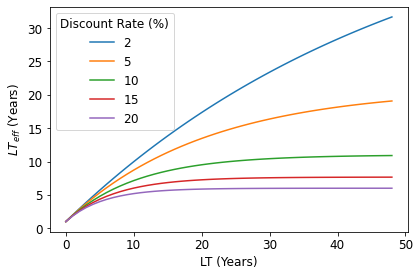

In [41]:

LT_max = 50
# a = [-100] + [10]*100
a = [1]*LT_max


fig, ax = plt.subplots()
for r in [0.02, 0.05, 0.1, 0.15, 0.2]:
    b = [npf.npv(r, a[:i]) for i in range(LT_max)]
    ax.plot(b[1:], label=r'${:.0f}$'.format(r*100))
ax.legend(title='Discount Rate (%)')
ax.set_xlabel('LT (Years)')

plt.ylabel('$LT_{eff}$ (Years)')
# ax.set_ylabel('$\sum_t^{LT} 1/(1+r)^t$')
fig.tight_layout()

For a constant annuity A paid over a lifetime LT (= N Years)

$ NPV = \sum_t^{LT}{\frac{A_t}{(1+r)^t}}  = A \sum_t^{LT}{\frac{1}{(1+r)^t}}  $

Using a geometric sum 


$ NPV = A \frac{1 - \frac{1}{(1+r)^{LT}} }{r}  $

Therefore the discount rate can mathemtatically be represented as a an effective lifetime, $LT_{eff} = \sum_t^{LT}{\frac{1}{(1+r)^t}}$ that the payment is paid over. Note that in the limit of r -> 0 this is equation has the limit
 $LT_{eff} = LT$.

$NPV = A*LT_{eff}$

Below shows a plot of $LT_{eff}$ for different LT as a function of discount rate. We can see for typical discount rates chosen of levelized cost analysis in the literature, ~ 10%, the effective lifetime is around 10 years. In this way discounted cash flow analysis skews technology selection for short lifetime technologies. 

Text(0, 0.5, '$LT_{eff}$ (Years)')

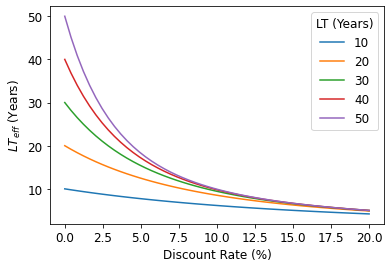

In [31]:
def LT_eff(LT, r):
    if r == 0:
        return LT
    else: 
        num = 1 - 1/((1+r)**LT)
        dem = r
        return num/dem

LTs = [10, 20, 30, 40, 50]

for LT in LTs:
    rs = np.linspace(0,0.2, 50)
    cas = [LT_eff(LT, r) for r in rs]

    rs_pct = [r*100 for r in rs]

    plt.plot(rs_pct, cas, label=LT)

plt.legend(title='LT (Years)')
plt.xlabel('Discount Rate (%)')
plt.ylabel('$LT_{eff}$ (Years)')